In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def i3_sigmoid(cov):
    l3 = (1 + cov[0][0]) * (1 + cov[2][2]) - cov[0][2] ** 2
    nom = 2 * (cov[1][2] * (1 + cov[0][0]) - cov[0][1] * cov[0][2])
    den = np.pi * (l3 * (1 + cov[0][0])) ** 0.5
    return nom / den

In [9]:
def i3_relu(cov):
    t1_nom = cov[0][1] * (cov[0][0] * cov[2][2] - cov[0][2] ** 2) ** 0.5
    t1_den = 2 * np.pi * cov[0][0]
    t2_nom = cov[1][2] * (np.arcsin(cov[0][2] / (cov[0][0] * cov[2][2]) ** 0.5))
    t2_den = 2 * np.pi
    t3 = 0.25 * cov[1][2]
    return t1_nom / t1_den + t2_nom / t2_den + t3

In [13]:
q_ii = 0.5
u_ip = 0
r_im = 0
u_pi = 0
s_pp = 1
v_pm = 0.5
r_mi = 0
v_mp = 0.5
t_mm = 1

covariance_matrix = [[q_ii, u_ip, r_im],[u_pi, s_pp, v_pm],[r_mi, v_mp, t_mm]]

In [14]:
i3_sigmoid(cov=covariance_matrix)

0.22507907903927654

In [15]:
i3_relu(cov=covariance_matrix)

0.125

In [39]:
def vary_v(v_i, v_j, N):
    v_range = np.linspace(v_i, v_j, N)
    
    q_ii = 0.5
    u_ip = 0
    r_im = 0.5
    u_pi = 0
    s_pp = 1
    r_mi = 0.5
    t_mm = 1
    
    covariance_matrices = [[[q_ii, u_ip, r_im],[u_pi, s_pp, v],[r_mi, v, t_mm]] for v in v_range]
    return covariance_matrices

def vary_r(r_i, r_j, N, v):
    r_range = np.linspace(r_i, r_j, N)
    
    q_ii = 0.5
    u_ip = 0.1
    u_pi = 0.1
    s_pp = 1
    t_mm = 1
    v_mp = v
    v_pm = v
    
    covariance_matrices = [[[q_ii, u_ip, r],[u_pi, s_pp, v_pm],[r, v_mp, t_mm]] for r in r_range]
    return covariance_matrices

In [40]:
i3_relu_vrange = [i3_relu(cov) for cov in vary_v(0, 1, 100)]
i3_sig_vrange = [i3_sigmoid(cov) for cov in vary_v(0, 1, 100)]

i3_relu_rrange = [i3_relu(cov) for cov in vary_r(0, 1, 100, 0)]
i3_sig_rrange = [i3_sigmoid(cov) for cov in vary_r(0, 1, 100, 0)]

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arcsin
  after removing the cwd from sys.path.


/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


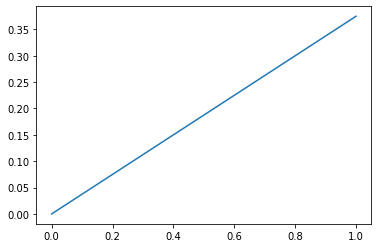

In [41]:
fig = plt.figure()
plt.plot(np.linspace(0, 1, 100), i3_relu_vrange)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


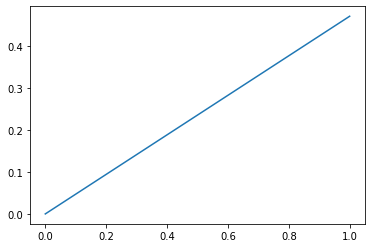

In [42]:
fig = plt.figure()
plt.plot(np.linspace(0, 1, 100), i3_sig_vrange)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


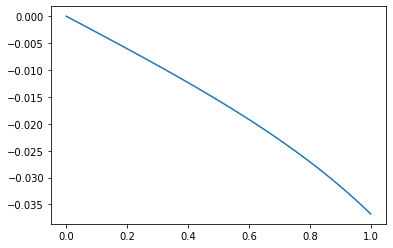

In [43]:
fig = plt.figure()
plt.plot(np.linspace(0, 1, 100), i3_sig_rrange)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


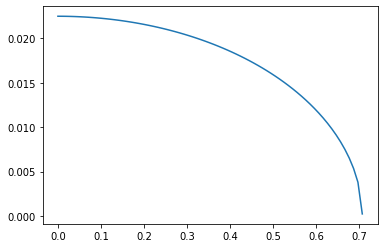

In [48]:
fig = plt.figure()
plt.plot(np.linspace(0, 1, 100), i3_relu_rrange)
fig.show()